In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.datasets import make_blobs

In [13]:
x,y = make_blobs(n_samples=10000,n_features=2,centers=3,random_state=42)

In [14]:
x

array([[-2.9688544 ,  7.93444368],
       [ 3.16120524, -0.25650696],
       [-1.89542677,  9.38974199],
       ...,
       [ 4.18013744,  1.63408139],
       [-2.20139585,  7.30411774],
       [-4.31294811,  9.34575702]])

In [15]:
y

array([0, 1, 0, ..., 1, 0, 0])

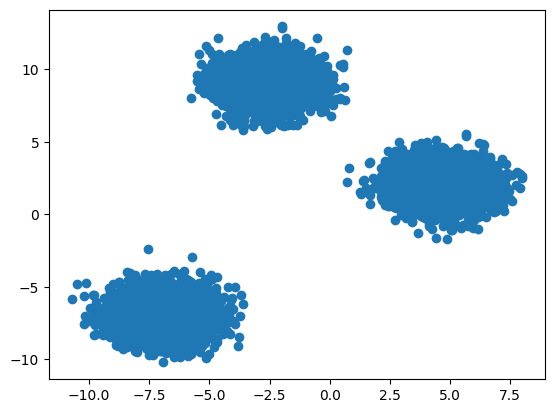

In [18]:
plt.scatter(x[:,0],x[:,1])

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans()

In [22]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [23]:
wcss

[666581.2685571671,
 188100.03739296139,
 20087.30494594766,
 17828.0837338506,
 15694.507060198532,
 13694.859675357635,
 12064.187541165391,
 10674.722802372946,
 9263.033486935736,
 8569.644898607065]

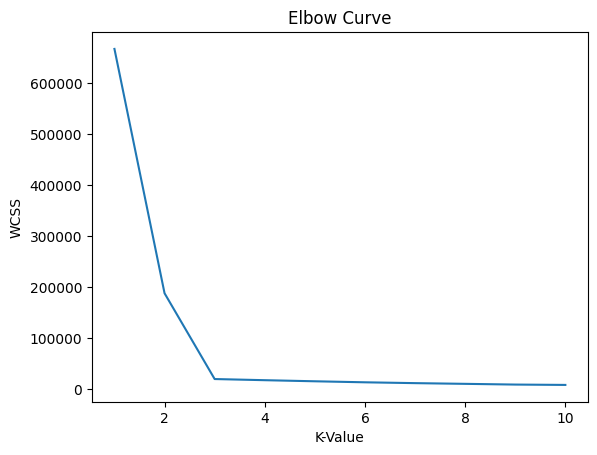

In [25]:
plt.plot(range(1,11),wcss)
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()


In [26]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [27]:
pre = kmeans.fit_predict(x)

In [28]:
pre

array([1, 2, 1, ..., 2, 1, 1])

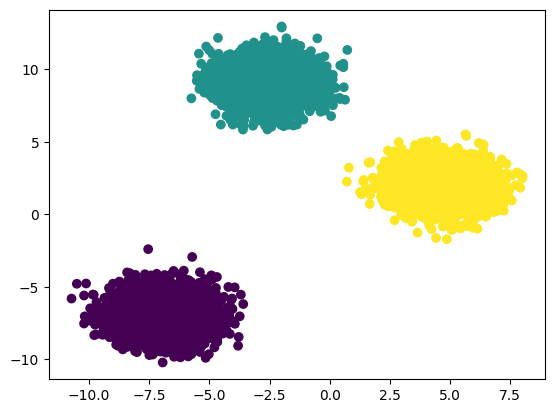

In [29]:
plt.scatter(x[:,0],x[:,1],c=pre)

In [30]:
from kneed import KneeLocator

In [31]:
k = KneeLocator(range(1,11),wcss,direction='decreasing',curve='convex')


In [32]:
k.elbow

3

In [34]:
from sklearn.metrics import silhouette_score
error = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x)
    score = silhouette_score(x,kmeans.labels_)
    error.append(score)



In [35]:
error

[0.7044756975100971,
 0.8411357171702263,
 0.6543851051258378,
 0.4789441663114325,
 0.31041565604410853,
 0.3160478015602059,
 0.32186363940384044,
 0.3292850414953203,
 0.32375278243347994]

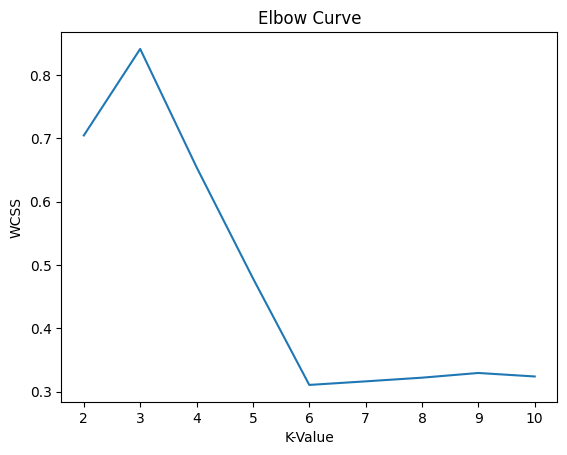

In [37]:
plt.plot(range(2,11),error)
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()